## <center>Working with Custom Images</center>

So far everything we've worked with has been nicely formatted for us already by Keras.
Let's explore what its like to work with a more realistic data set.

### The Data


ORIGINAL DATA SOURCE:

The dataset contains 2 folders - Infected - Uninfected

And a total of 27,558 images.

Acknowledgements
This Dataset is taken from the official NIH Website: https://ceb.nlm.nih.gov/repositories/malaria-datasets/ 

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D # same as MaxPool2D

In [2]:
my_data_dir = 'C:/Users/Lenovo/Desktop/Python/Neural Networks/Data Sets/TensorFlow/cell_images'

In [3]:
# CONFIRM THAT THIS REPORTS BACK 'test', and 'train'
os.listdir(my_data_dir) 

['test', 'train']

In [4]:
test_path = my_data_dir+'\\test\\'
train_path = my_data_dir+'\\train\\'

In [5]:
os.listdir(test_path)

['parasitized', 'uninfected']

In [6]:
os.listdir(train_path)

['parasitized', 'uninfected']

In [7]:
os.listdir(train_path+'\\parasitized')[0]

'C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [8]:
para_cell = train_path+'\\parasitized'+'\\C100P61ThinF_IMG_20150918_144104_cell_162.png'

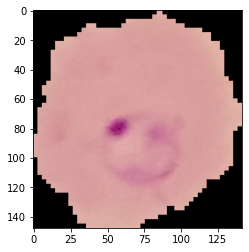

In [9]:
para_img= imread(para_cell)
plt.imshow(para_img)

In [10]:
para_img.shape

(148, 142, 3)

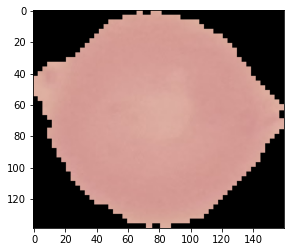

In [11]:
unifected_cell_path = train_path+'\\uninfected\\'+os.listdir(train_path+'\\uninfected')[0]
unifected_cell = imread(unifected_cell_path)
plt.imshow(unifected_cell)

**Let's check how many images there are in the whole dataset**

In [12]:
train_size = len(os.listdir(train_path+'\\uninfected')) + len(os.listdir(train_path+'\\parasitized'))
train_size

24960

In [13]:
test_size = len(os.listdir(test_path+'\\uninfected')) + len(os.listdir(test_path+'\\parasitized'))
test_size

2600

**Let's find out the average dimensions of these images.**

In [14]:
unifected_cell.shape

(139, 160, 3)

In [15]:
para_img.shape

(148, 142, 3)

In [16]:
dim1 = []
dim2 = []
for image_filename in os.listdir(test_path+'\\uninfected'):
    
    img = imread(test_path+'\\uninfected'+'\\'+image_filename)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

c:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


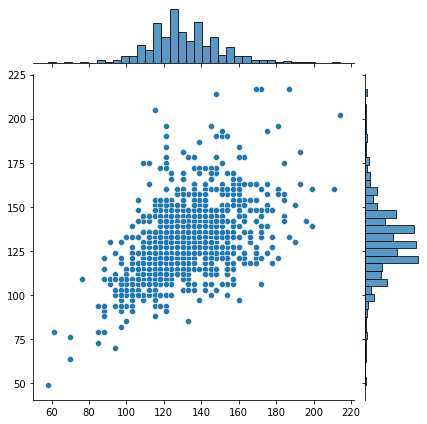

In [17]:
sns.jointplot(dim1,dim2);

In [18]:
np.mean(dim1)

130.92538461538462

In [19]:
np.mean(dim2)

130.75

In [20]:
image_shape = (130,130,3)

### Preparing the Data for the model

There is too much data for us to read all at once in memory. We can use some built in functions in Keras to automatically process the data, generate a flow of batches from a directory, and also manipulate the images.

#### Image Manipulation

Its usually a good idea to manipulate the images with rotation, resizing, and scaling so the model becomes more robust to different images that our data set doesn't have. We can use the **ImageDataGenerator** to do this automatically for us. Check out the documentation for a full list of all the parameters you can use here!

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [22]:
image_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 5%
                               height_shift_range=0.10, # Shift the pic height by a max of 5%
                               # rescale= select value --> in this case is already rescaled the dataset.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

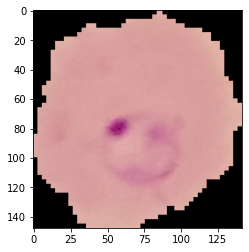

In [23]:
plt.imshow(para_img)

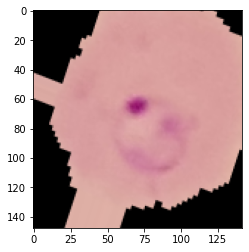

In [24]:
plt.imshow(image_gen.random_transform(para_img))

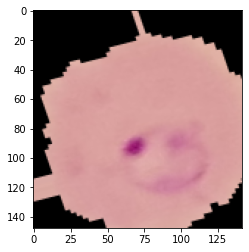

In [25]:
plt.imshow(image_gen.random_transform(para_img))

With this random transformation, the dataset can be increased with ease. In a hypothetical case in which the dataset is not big enough, random transformation can be performed. 

#### Generating many manipulated images from a directory


In order to use .flow_from_directory, you must organize the images in sub-directories. This is an absolute requirement, otherwise the method won't work. The directories should only contain images of one class, so one folder per class of images.

Structure Needed:

* Image Data Folder
    * Class 1
        * 0.jpg
        * 1.jpg
        * ...
    * Class 2
        * 0.jpg
        * 1.jpg
        * ...
    * ...
    * Class n

In [26]:
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [27]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


### Creating the Model

In [29]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(256, activation="relu", ))
model.add(Dropout(0.5))

# Last layer, remember its binary so we use sigmoid
model.add(Dense(1, activation='sigmoid',))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0

In [31]:
from tensorflow.keras.callbacks import EarlyStopping

In [32]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [33]:
batch_size = 16

In [34]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 24958 images belonging to 2 classes.


In [35]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=False)

Found 2600 images belonging to 2 classes.


In [36]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [37]:
import warnings
warnings.filterwarnings('ignore')

In [38]:
results = model.fit_generator(train_image_gen,epochs=10,
                              validation_data=test_image_gen,
                             callbacks=[early_stop])

Epoch 1/10
1560/1560 [==============================] - 471s 302ms/step - loss: 0.9099 - accuracy: 0.5322 - val_loss: 0.6990 - val_accuracy: 0.5242
Epoch 2/10
1560/1560 [==============================] - 443s 284ms/step - loss: 0.6890 - accuracy: 0.5433 - val_loss: 0.7061 - val_accuracy: 0.5215
Epoch 3/10
1560/1560 [==============================] - 393s 252ms/step - loss: 0.6857 - accuracy: 0.5538 - val_loss: 0.6798 - val_accuracy: 0.5685
Epoch 4/10
1560/1560 [==============================] - 392s 251ms/step - loss: 0.6809 - accuracy: 0.5764 - val_loss: 0.6824 - val_accuracy: 0.5696
Epoch 5/10
1560/1560 [==============================] - 455s 292ms/step - loss: 0.6820 - accuracy: 0.5785 - val_loss: 0.6812 - val_accuracy: 0.5623


In [39]:
losses = pd.DataFrame(model.history.history)
losses

,loss,accuracy,val_loss,val_accuracy
0,0.909884,0.532214,0.698994,0.524231
1,0.689028,0.543313,0.706090,0.521538
2,0.685724,0.553810,0.679819,0.568462
3,0.680909,0.576408,0.682408,0.569615
4,0.682005,0.578452,0.681196,0.562308


<AxesSubplot:>

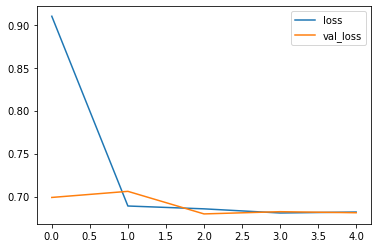

In [40]:
losses[['loss','val_loss']].plot()

In [41]:
model.metrics_names

['loss', 'accuracy']

In [42]:
model.evaluate_generator(test_image_gen)

[0.6796286702156067, 0.5757692456245422]

In [43]:
from tensorflow.keras.preprocessing import image

In [44]:
# https://datascience.stackexchange.com/questions/13894/how-to-get-predictions-with-predict-generator-on-streaming-test-data-in-keras
pred_probabilities = model.predict_generator(test_image_gen)
pred_probabilities

array([[0.47229642],
       [0.42477754],
       [0.46884453],
       ...,
       [0.5043876 ],
       [0.48526582],
       [0.4885326 ]], dtype=float32)

In [45]:
test_image_gen.classes

array([0, 0, 0, ..., 1, 1, 1])

In [46]:
predictions = pred_probabilities > 0.5

In [47]:
from sklearn.metrics import classification_report,confusion_matrix

In [48]:
print(classification_report(test_image_gen.classes,predictions))
confusion_matrix(test_image_gen.classes,predictions)

              precision    recall  f1-score   support

           0       0.57      0.50      0.53      1300
           1       0.55      0.62      0.58      1300

    accuracy                           0.56      2600
   macro avg       0.56      0.56      0.56      2600
weighted avg       0.56      0.56      0.56      2600



array([[653, 647],
       [497, 803]], dtype=int64)

In [49]:
para_cell

'C:/Users/Lenovo/Desktop/Python/Neural Networks/Data Sets/TensorFlow/cell_images\\train\\\\parasitized\\C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [50]:
my_image = image.load_img(para_cell,target_size=image_shape)

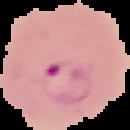

In [51]:
my_image

In [52]:
type(my_image)

PIL.Image.Image

In [53]:
my_image = image.img_to_array(my_image)

In [54]:
type(my_image)

numpy.ndarray

In [55]:
my_image.shape

(130, 130, 3)

In [56]:
my_image = np.expand_dims(my_image, axis=0)

In [57]:
my_image.shape

(1, 130, 130, 3)

In [58]:
model.predict(my_image) > 0.5

1/1 [==============================] - 0s 122ms/step


array([[ True]])